# GROUP 3 PROJECT ON WD(WINE DATASET)
## BELOW ARE PROJECT MEMBERS

1.	ALADEJARE VALENTINE ADURAGBEMI	CSC/18/935 **GROUP LEADER**
2.	ADEWUSI OLAOLUWA	170404016
3.	LAWAL ANUOLUWAPO OLAYELE.	CSC/18/966
4.	IWAENI MOSES DESMOND.	CSC/DE/19/116
5.	OWADARA FESTUS IYANUOLUWA	CSC/18/994
6.	AKINYEMI TEMIDAYO AKIN	CSC/18/934
7.	JEJELAYE IYANU G	170404074
8.	OLOTU EMMANUEL OLUWADUNSIN	CSC/18/985

# Wine Dataset

**Feature selection w/PCA with the Wine Dataset**

The data are the results of a chemical analysis of wines grown in the same region in Italy but derived from three different cultivars (classes/breeds?). The analysis determined the quantities of 13 constituents found in each of the three types of wines.

**My Comment (Udi):**
There seem to be three diffrent classes, marked as "a", "b" and "c". Unfortunatly, we don't know what they are - but it's interesting. 

### Goal of this work
This is an excerise in finding minimal repesentation of data that would still be usefull for Machine Learning tasks such as classification in this case. We will test two feature selection themes and also use PCA to select the best two features out of 13, to assign vine-cultivars lables to wines, according to their chemical composition. 

## Loading the data

In [1]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pylab as plt

import seaborn as sns

df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

add headers:

In [2]:
df_wine.columns = ['Class', 
                   'Alcohol',
                   'Malic acid',
                   'Ash', 
                   'Alcalinity of ash',
                   'Magnesium',
                   'Total phenols',
                   'Flavanoids',
                   'Nonflavanoid phenols',
                   'Proanthocyanins',
                   'Color intensity',
                   'Hue',
                   'OD280/OD315 of diluted wines',
                   'Proline']


df_wine['Class'] = df_wine['Class'].astype(np.int).astype('category')

bit of exploration:

In [3]:
df_wine.describe()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [4]:
X = df_wine.drop('Class', 1).values
y = df_wine['Class'].astype('int').values

## Classification with all features

For starters, let's see how good is this dataset for classification and use all the available data for doing classification. The model will be "multinomial regression" and  use cross-validation since we have a relativley small set of only 178 values. 

In [5]:
from sklearn.model_selection import cross_val_score
from sklearn import linear_model

In [6]:
logreg = linear_model.LogisticRegression(C=1e5, random_state=613)

# scoring by accuracy simply means scoring by the precentage
# of correct predictions
scores = cross_val_score(logreg, X, y, cv=4, scoring='accuracy')
print('Mean accuracy of {:.1f}%'.format(scores.mean()*100))

Mean accuracy of 93.3%


This accuracy is quite good and will be our ultimate goal to achieve.

## Classification using only two features

So, using all available data, gave us accuracy of approximatly 93%. Let us now find the best possible way, to have the highest accucracy with only two features. We'll use two ways to select the "best two" features.

#### chi square $\chi^2$
We'll use the chi-square statistical test to choose the best two features with highest  correlation with the target variable:  

In [7]:
n_features = 2

In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

chi2_best = SelectKBest(chi2, k=n_features)

X_ch2 = chi2_best.fit_transform(X, y)

# this is a relatively strait-forward way to get to two highest indicies
max_indx = pd.Series(np.argsort(chi2_best.scores_), name='score')\
                    .nlargest(n=n_features).\
                    index.values
        
print('The best features of the chi2 test are:\n')

for i in range(n_features):
    # the +1 factor is because 
    print('{}. {}'.format(i+1, df_wine.columns[max_indx[i] + 1]))

The best features of the chi2 test are:

1. Proline
2. Flavanoids


### Mutual information
We can do the same thing, by looking at the mutual infromation and choosing the variables mutual information with the target: 

In [9]:
from sklearn.feature_selection import mutual_info_classif as mu_clsf

# Estimated mutual information between each feature and the labels
mu_score = mu_clsf(X, y, random_state=613)

max_indx = pd.Series(np.argsort(mu_score), name='mi_score')\
                    .nlargest(n=n_features).\
                    index.values

print('The best features of the mutual-information criteria are:')

for i in range(n_features):
    # the +1 factor is because 
    print('{}'.format(df_wine.columns[max_indx[i] + 1]))
    
# extract the relevant columns
X_mi = X[:, [max_indx[0], max_indx[1]]]

The best features of the mutual-information criteria are:
OD280/OD315 of diluted wines
Color intensity


In [10]:
X_mi.shape

(178, 2)

### So, which one is it?

Between these two, chi2 and mutual-information, which one is best for classification?
Let's fit a model for each and look at it's predictive power:

In [11]:
scores = cross_val_score(logreg, X_ch2, y, cv=4, scoring='accuracy')
print('Chi2 mean accuracy: {:.1f}%'.format(scores.mean()*100))

Chi2 mean accuracy: 86.6%


In [12]:
scores = cross_val_score(logreg, X_mi, y, cv=4, scoring='accuracy')
print('Mutual-information mean accuracy: {:.1f}%'.format(scores.mean()*100))

Mutual-information mean accuracy: 88.3%


So, the mutual-information selection criteria is very slightly better than chi2 in this case. However, the difference is simply too small to reach significant conclusion.

Actually, 88.3% is only 5% less than using all features at once, that's pretty great! 

### Plotting the decision boundry
For the fun of it, let's plot the dicision boundry based on the two features selected by the multual-information criterion.

In [13]:
reg_mi = logreg.fit(X_mi, y)

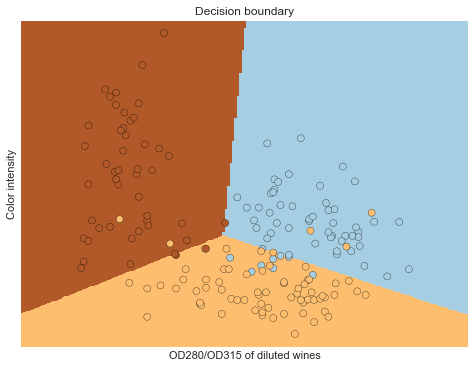

In [14]:
# import matplotlib as mpl
# mpl.rcParams.update({'font.size': 50})
# plt.rc('font', size=50)
# mpl.rcParams['font.size'] = 200


h = .02  # step size in the mesh

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X_mi[:, 0].min() - .5, X_mi[:, 0].max() + .5
y_min, y_max = X_mi[:, 1].min() - .5, X_mi[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = reg_mi.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(8, 6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_mi[:, 0], X_mi[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('OD280/OD315 of diluted wines')
plt.ylabel('Color intensity')
plt.title('Decision boundary')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

plt.show()

## Principle components analysis
To continue our search of smaller feature space, let's apply principle components anaylysis (PCA). PCA requires feature standartization, so we'll do that first: 

In [15]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)

Now, let's apply the PCA transformation for the feature space:

In [16]:
from sklearn.decomposition import PCA

pca = PCA(n_components=X_std.shape[1]) # use all features
X_trans_13 = pca.fit_transform(X_std)

### plot explained variance
The "explaind variance" quantifies how much of the variance of the data is explained by each "new" feature space. In the following plot, I show this quanitity as function of the number of PCA features:

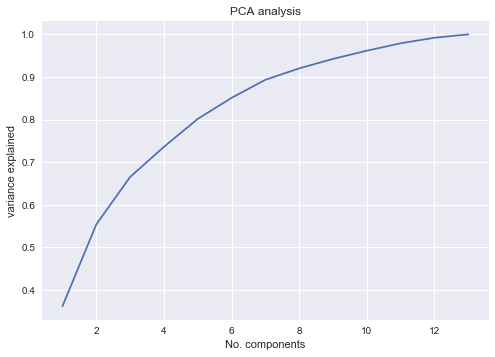

In [17]:
comp_n_axis = np.arange(1, 14)
variance_axis = list()
for i in range(13):
    variance_axis.append(pca.explained_variance_ratio_[0:i+1].sum())
    
plt.title('PCA analysis')
plt.ylabel('variance explained')
plt.xlabel('No. components')
plt.plot(comp_n_axis, variance_axis);

The explained variance reaches 90% at about 8 components, but only 55% with two vectors. However, let's proceed with only two features. One of the nice things about PCA is that it is possible to quantify the relative importance of each of the transformed features according the it's singular values.

and look at the score:

In [18]:
pca = PCA(n_components=2)
X_pca_2 = pca.fit_transform(X_std)

In [19]:
scores = cross_val_score(logreg, X_pca_2, y, cv=4, scoring='accuracy')
print('PCA2 mean accuracy: {:.1f}%'.format(scores.mean()*100))

PCA2 mean accuracy: 95.0%


That's very good! with only two features we can gen 95.0% compared to 88.3% as selected by the mutual-information criteria. However, this isn't really a fair comparison becuase the PCA makes new features be combining data from all the features into every transformed ones - such that the new features contain more information in them.